[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sample Dataset:
                                               review  sentiment
0          I love this product! Highly recommend it.          1
1    Worst experience ever. Completely disappointed.          0
2  Okayish quality, not great but not terrible ei...          1
3    Absolutely wonderful! Exceeded my expectations.          1
4            Terrible service. Will never come back.          0
5                          Good value for the price.          1
6                       I hate this. Waste of money.          0
7                       Satisfied with the purchase.          1
8                                      Not worth it.          0
9                      Fantastic experience overall.          1

Cleaned Reviews:
                                               review  \
0          I love this product! Highly recommend it.   
1    Worst experience ever. Completely disappointed.   
2  Okayish quality, not great but not terrible ei...   
3    Absolutely wonderful! Exceeded 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


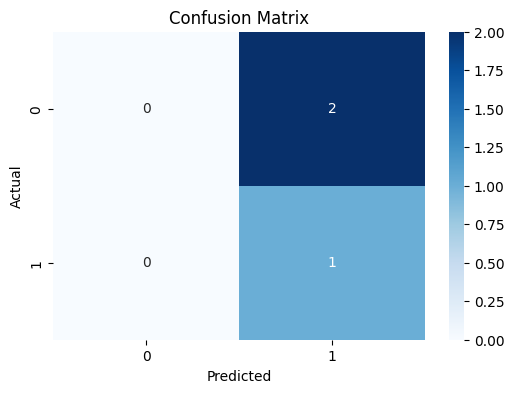


📌 Conclusion:
- Logistic Regression with TF-IDF effectively classifies sentiments in customer reviews.
- Simple preprocessing and vectorization are sufficient for small datasets.


In [1]:
# 🌟 Sentiment Analysis using TF-IDF and Logistic Regression

# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# 📂 Step 2: Sample Customer Review Dataset
data = pd.DataFrame({
    'review': [
        'I love this product! Highly recommend it.',
        'Worst experience ever. Completely disappointed.',
        'Okayish quality, not great but not terrible either.',
        'Absolutely wonderful! Exceeded my expectations.',
        'Terrible service. Will never come back.',
        'Good value for the price.',
        'I hate this. Waste of money.',
        'Satisfied with the purchase.',
        'Not worth it.',
        'Fantastic experience overall.'
    ],
    'sentiment': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
})

print("Sample Dataset:\n", data)

# 🧹 Step 3: Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

data['clean_review'] = data['review'].apply(clean_text)
print("\nCleaned Reviews:\n", data[['review', 'clean_review']])

# 🧠 Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['clean_review'])  # feature matrix
y = data['sentiment']  # target labels

# ✂️ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🤖 Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔍 Step 7: Model Evaluation
y_pred = model.predict(X_test)

print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 📊 Step 8: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📌 Step 9: Conclusion
print("\n📌 Conclusion:")
print("- Logistic Regression with TF-IDF effectively classifies sentiments in customer reviews.")
print("- Simple preprocessing and vectorization are sufficient for small datasets.")
